# Austin Reed
Assignment #2

Create a 12-panel plot of the climatology (1 panel for each month) of your data.

In [1]:
#import all necessary packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE

In [3]:
# load in the data and all necessary variables
f= '~/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
print(DS1)
data_lat= DS1.latitude.values #latitudes
data_lon= DS1.longitude.values #longitudes
nlats = len(data_lat[:])
nlons = len(data_lon[:])
time = DS1.time
#Extracts variables
total_cloud_cover = DS1.tcc
total_precip = DS1.tp
column_cloud_lw= DS1.tclw
total_column_wv = DS1.tcwv
ds_mean = DS1.mean(dim=('time','expver')) #this removes the expver variable in the dataset by averaging over that dimension
total_cloud_cover_1 = ds_mean.tcc.values #total cloud cover
total_precip_1= ds_mean.tp.values #total precipitation
column_cloud_lw_1 = ds_mean.tclw.values #total column cloud liquid water
total_column_watervapor = ds_mean.tcwv.values #total column cloud water vapor

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 401, longitude: 241, time: 512)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-08-01
Data variables: (12/33)
    cbh        (time, expver, latitude, longitude) float32 dask.array<chunksize=(512, 2, 401, 241), meta=np.ndarray>
    cp         (time, expver, latitude, longitude) float32 dask.array<chunksize=(512, 2, 401, 241), meta=np.ndarray>
    crr        (time, expver, latitude, longitude) float32 dask.array<chunksize=(512, 2, 401, 241), meta=np.ndarray>
    hcc        (time, expver, latitude, longitude) float32 dask.array<chunksize=(512, 2, 401, 241), meta=np.ndarray>
    ilspf      (time, expver, latitude, longitude) float32 dask.array<chunksize=(512, 2, 401, 241), meta=np.ndarray>
    lsp        (time, ex

In [8]:
dataset =DS1.mean(dim='expver') # monthly averaged values of daily data on single levels
#print(dataset)
data_lat= DS1.latitude #latitudes
data_lon= DS1.longitude #longitudes
#print(data_lat)
#print(data_lon)
ds_climo = dataset.groupby('time.month').mean(dim='time') #computes the climatology
print(ds_climo)

<xarray.Dataset>
Dimensions:    (latitude: 401, longitude: 241, month: 12)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/33)
    cbh        (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    cp         (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    crr        (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    hcc        (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    ilspf      (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    lsp        (month, latitude, longitude) float32 dask.array<chunksize=(1, 401, 241), meta=np.ndarray>
    ...         ...
    p90.162    (month,

Text(0.5, 0.98, 'Climatology of Monthly Averaged Precipitation over Africa (in meters/day)')

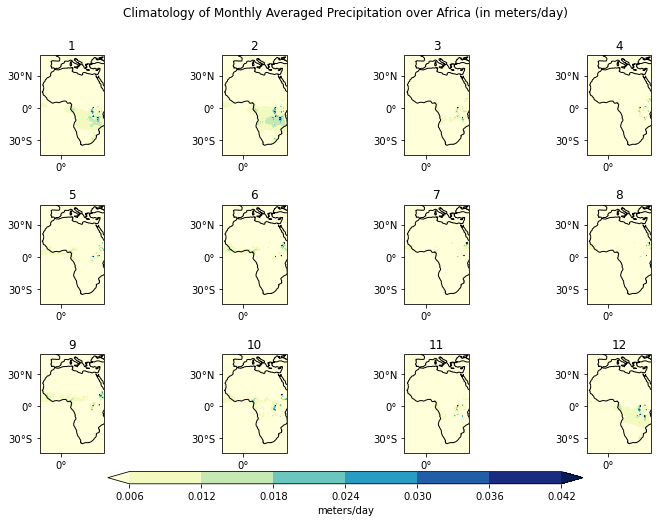

In [13]:
# Define the figure and each axis for the 3 rows and 4 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()
#Loop over all of the months and plot
for i,month in enumerate(ds_climo['month']):

        # Select the month
        data=ds_climo['tp'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_climo['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_climo['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='YlGnBu',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the month
        axs[i].set_title(month.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        axs[i].set_extent([-20, 40, -40, 45])
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='meters/day')

# Add a big title at the top
plt.suptitle('Climatology of Monthly Averaged Precipitation over Africa (in meters/day)')

Text(0.5, 0.98, 'Climatology of Montly Averaged Precipitable Water over Africa (in kg*m^-2/day)')

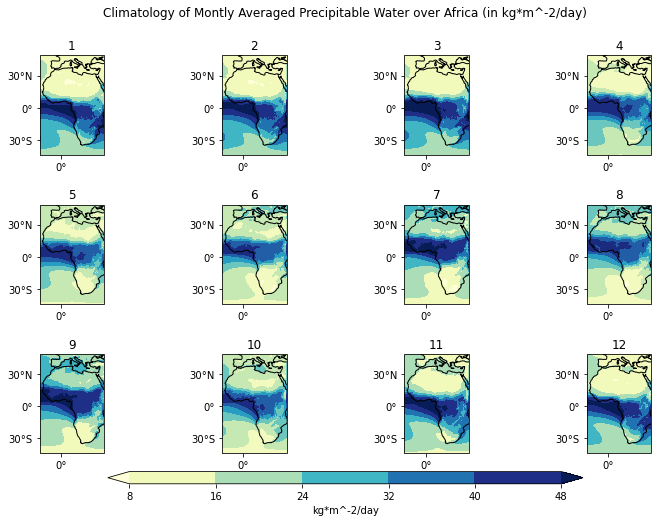

In [14]:
# Define the figure and each axis for the 3 rows and 4 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()
#Loop over all of the months and plot
for i,month in enumerate(ds_climo['month']):

        # Select the month
        data=ds_climo['tcwv'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_climo['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_climo['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='YlGnBu',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the month
        axs[i].set_title(month.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        axs[i].set_extent([-20, 40, -40, 45])
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='kg*m^-2/day')

# Add a big title at the top
plt.suptitle('Climatology of Montly Averaged Precipitable Water over Africa (in kg*m^-2/day)')